*1(a) pre-prunning*

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


iris=load_iris()
X=iris.data
y=iris.target

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, # 70% training, 30% testing
                                                   random_state=42 # for reproducibility
                                                   )


gini_cofficient_pre_prunning=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2, min_samples_leaf=2)
gini_cofficient_pre_prunning.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
# predictions
y_train_pred_pre_prunning=gini_cofficient_pre_prunning.predict(X_train)
y_test_pred_pre_prunning = gini_cofficient_pre_prunning.predict(X_test)

# accuracy score
train_accuracy_pre_prunning = accuracy_score(y_true=y_train, y_pred=y_train_pred_pre_prunning)
test_accuracy_pre_prunning=accuracy_score(y_true=y_test, y_pred=y_test_pred_pre_prunning)

In [40]:
print(train_accuracy_pre_prunning)
print(test_accuracy_pre_prunning)

0.9619047619047619
1.0


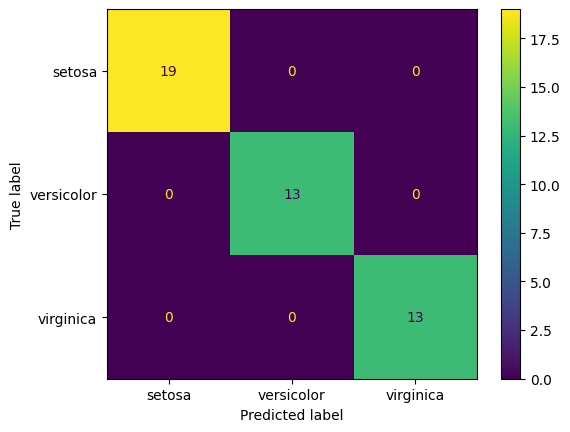

In [57]:
# confusion matrix pre_prunning
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_pre_prunning=confusion_matrix(y_true=y_test, y_pred=y_test_pred_pre_prunning, labels=gini_cofficient_pre_prunning.classes_)
conf_matrix_pre_prunning=ConfusionMatrixDisplay(confusion_matrix=cm_pre_prunning,display_labels=iris.target_names)
conf_matrix_pre_prunning.plot()
plt.show()

*finding best ccp_alpha*

In [42]:
# how to find the best vlaues of `ccp_alpha` for best post-prunning
clf=DecisionTreeClassifier(random_state=42)
path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities=path.ccp_alphas, path.impurities

# finding the suitable training, testing score for different alphas
training_score=[]
testing_score=[]
for alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    training_score.append(clf.score(X_train, y_train))
    testing_score.append(clf.score(X_test, y_test))

print(training_score)
print(testing_score)
print(ccp_alphas)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.         0.00923521 0.01269841 0.01269841 0.01847042 0.02705804
 0.25028684 0.31210884]


*1(b) post-prunning*

In [46]:
gini_cofficient_post_prunning=DecisionTreeClassifier(random_state=42, ccp_alpha=0.01847042)
gini_cofficient_post_prunning.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
y_train_pred_post_prunning=gini_cofficient_post_prunning.predict(X_train)
y_test_pred_post_prunning=gini_cofficient_post_prunning.predict(X_test)

In [48]:
# accuracy score
train_accuracy_post_prunning=accuracy_score(y_true=y_train,y_pred=y_train_pred_post_prunning)
test_accuracy_post_prunning=accuracy_score(y_true=y_test,y_pred=y_test_pred_post_prunning)

print(train_accuracy_post_prunning)
print(test_accuracy_post_prunning)

0.9428571428571428
1.0


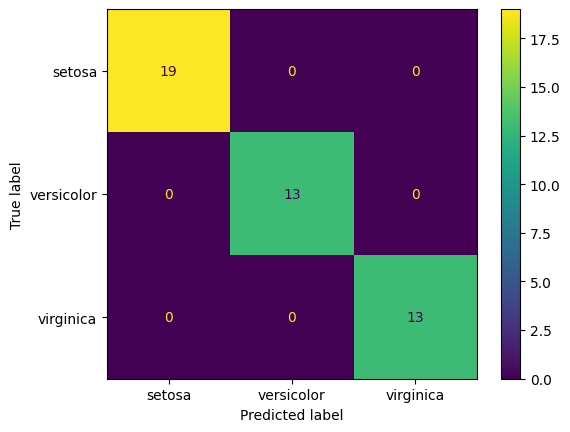

In [58]:
# confusion matrix post-prunning
cm_post_prunning=confusion_matrix(y_true=y_test, y_pred=y_test_pred_post_prunning,labels=gini_cofficient_post_prunning.classes_)
conf_matrix_post_prunning=ConfusionMatrixDisplay(cm_post_prunning,display_labels=iris.target_names)
conf_matrix_post_prunning.plot()
plt.show()



for getting *Tree depth* and *number of nodes* pre, post prunning, we can use

`clf.get_depth()` : returns the maximum depth of a tree

`clf.tree_.node_count` : total number of nodes (internal + external)

`clf.get_n_leaves()` : returns numger of leave nodes

In [60]:
# tree depth and number of nodes pre-prunning
print(gini_cofficient_pre_prunning.get_depth())
print(gini_cofficient_pre_prunning.tree_.node_count)

3
9


In [62]:
# tree depth and number of nodes post-prunning
print(gini_cofficient_post_prunning.get_depth())
print(gini_cofficient_post_prunning.tree_.node_count)

3
7
